In [8]:
import os
from glob import glob
import pandas as pd
from barplots import barplots

In [9]:
datasets = {
    "resized_processed": "No_processing",
    "processed": "Processed",
    "demosaicking_processed": "Processed_Demosaicking",
}

In [14]:
data = []
for path in glob("results/*/*/*/*.csv"):
    _, dataset, _, model, _ = path.split(os.sep)
    df = pd.read_csv(path, index_col=0)
    df["dataset"] = datasets[dataset]
    df["model"] = model
    data.append(df)
df = pd.concat(data).reset_index(drop=True)
df

,loss,accuracy,AUPRC,AUROC,run_type,holdout_number,task_name,dataset,model
0,0.420109,0.894413,0.447998,0.857338,training,0,covid_or_pneumonia_vs_other,No_processing,ResNet50V2
1,0.762970,0.609436,0.740128,0.545573,validation,0,covid_or_pneumonia_vs_other,No_processing,ResNet50V2
2,0.739079,0.306723,0.208972,0.402826,test,0,covid_or_pneumonia_vs_other,No_processing,ResNet50V2
3,7.748330,0.023170,0.023639,0.529095,training,0,covid_vs_pneumonia,No_processing,ResNet50V2
4,0.897976,0.870301,0.886602,0.530332,validation,0,covid_vs_pneumonia,No_processing,ResNet50V2
...,...,...,...,...,...,...,...,...,...
256,0.922470,0.859023,0.889321,0.539213,validation,5,covid_vs_pneumonia,Processed,InceptionResNetV2
257,3.206536,0.292595,0.099572,0.828164,test,5,covid_vs_pneumonia,Processed,InceptionResNetV2
258,0.387566,0.972859,0.013249,0.795778,training,5,covid_vs_other,Processed,InceptionResNetV2
259,0.819647,0.399738,0.682353,0.582761,validation,5,covid_vs_other,Processed,InceptionResNetV2


In [ ]:
temp = df[df.]

Rendering barplots:   0%|                                                                               | 0/4 …

((<Figure size 3000x480 with 3 Axes>,
  <Figure size 3000x480 with 3 Axes>,
  <Figure size 3000x480 with 3 Axes>,
  <Figure size 3000x480 with 3 Axes>),
 (array([<AxesSubplot:title={'center':'Test'}, xlabel='AUROC'>,
         <AxesSubplot:title={'center':'Training'}, xlabel='AUROC'>,
         <AxesSubplot:title={'center':'Validation'}, xlabel='AUROC'>],
        dtype=object),
  array([<AxesSubplot:title={'center':'Test'}, xlabel='AUPRC'>,
         <AxesSubplot:title={'center':'Training'}, xlabel='AUPRC'>,
         <AxesSubplot:title={'center':'Validation'}, xlabel='AUPRC'>],
        dtype=object),
  array([<AxesSubplot:title={'center':'Test'}, xlabel='Loss'>,
         <AxesSubplot:title={'center':'Training'}, xlabel='Loss'>,
         <AxesSubplot:title={'center':'Validation'}, xlabel='Loss'>],
        dtype=object),
  array([<AxesSubplot:title={'center':'Test'}, xlabel='Accuracy'>,
         <AxesSubplot:title={'center':'Training'}, xlabel='Accuracy'>,
         <AxesSubplot:title={'cent

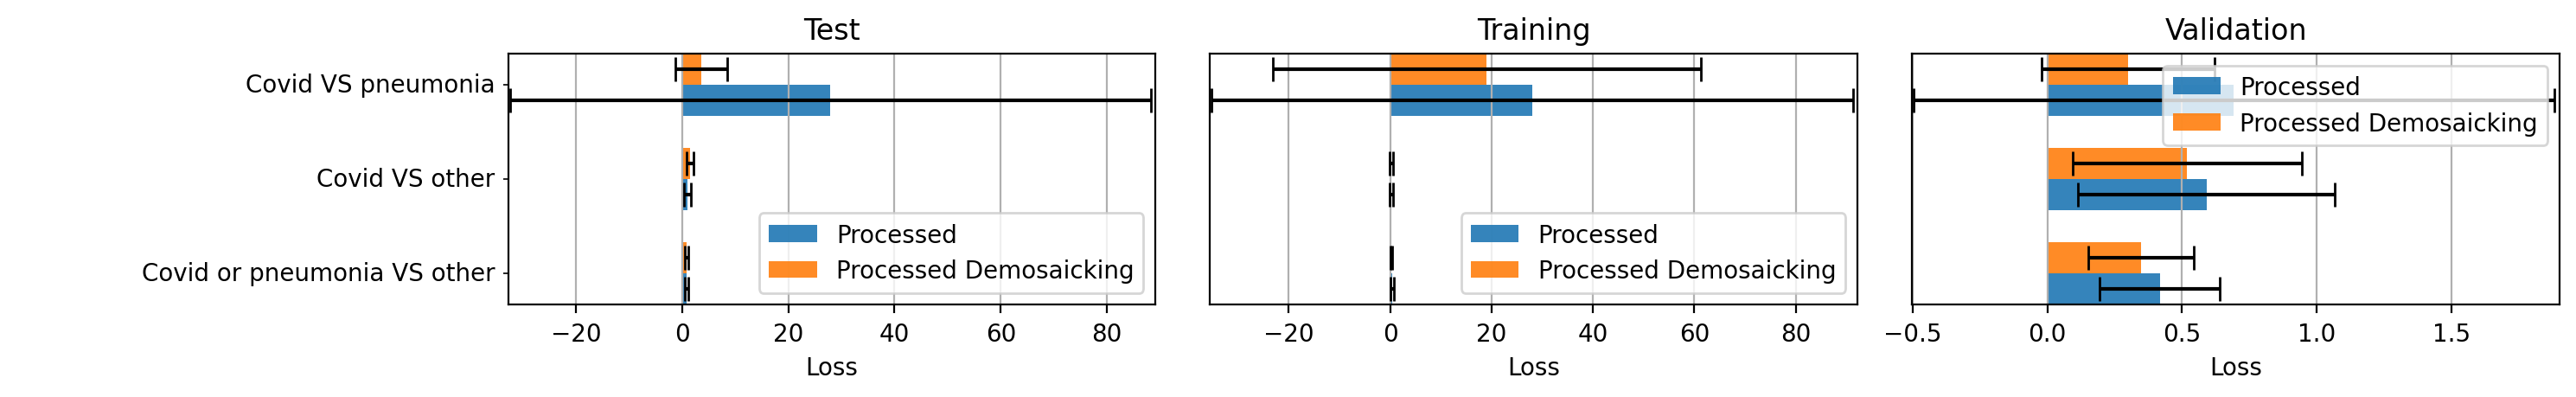

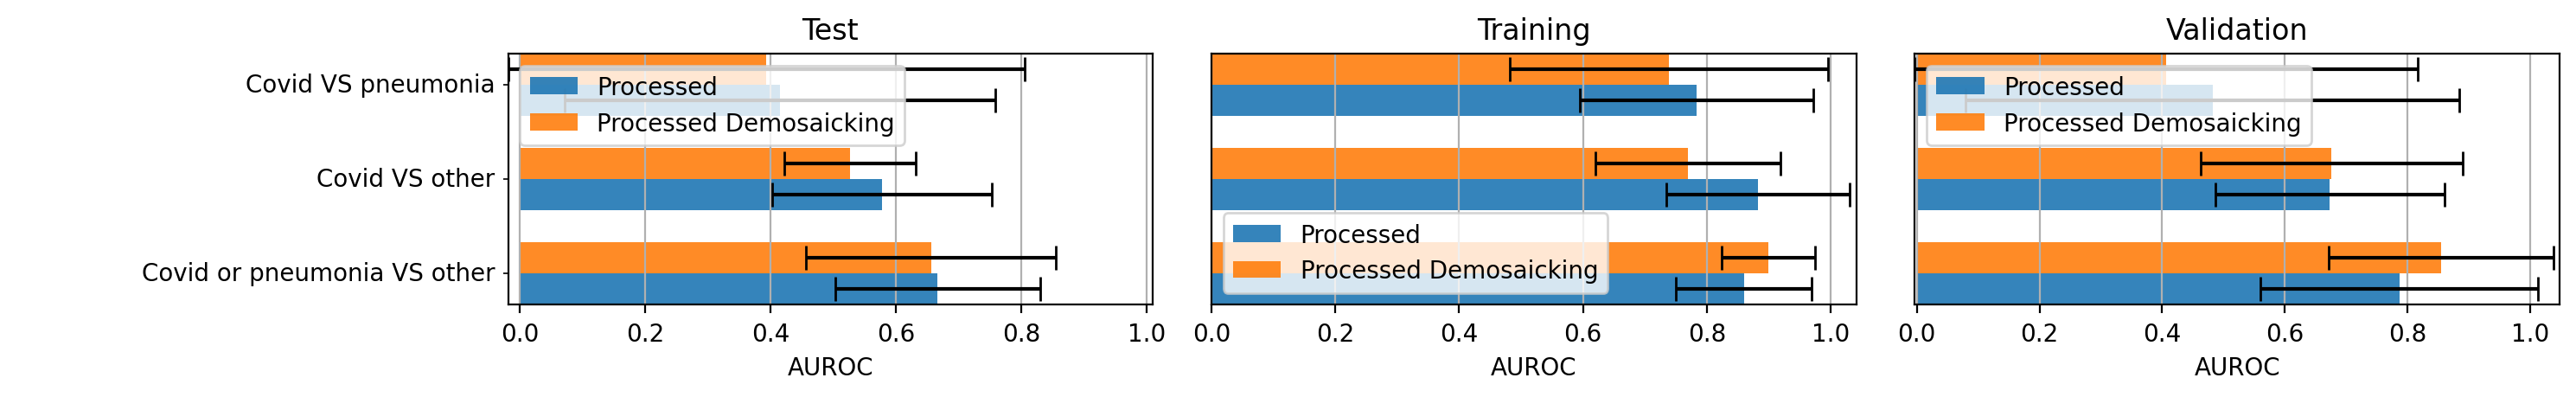

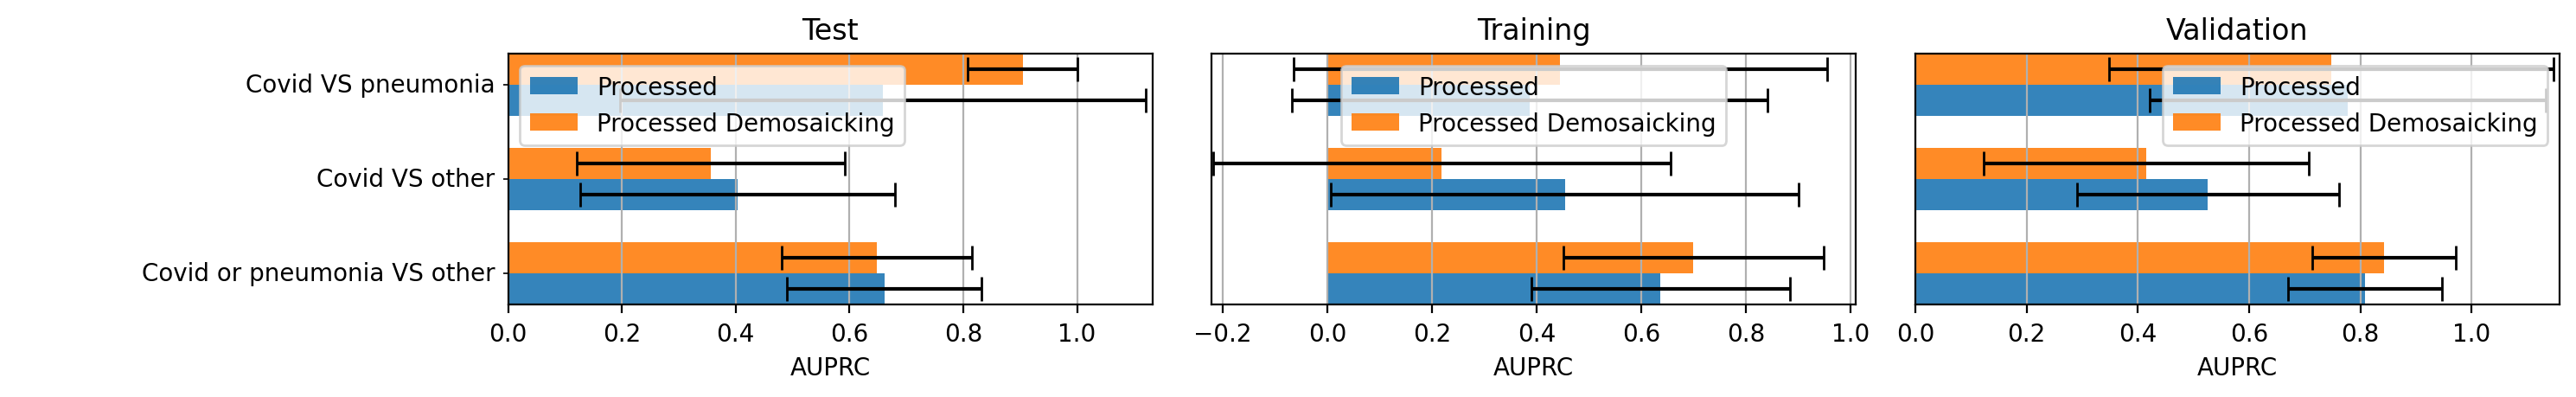

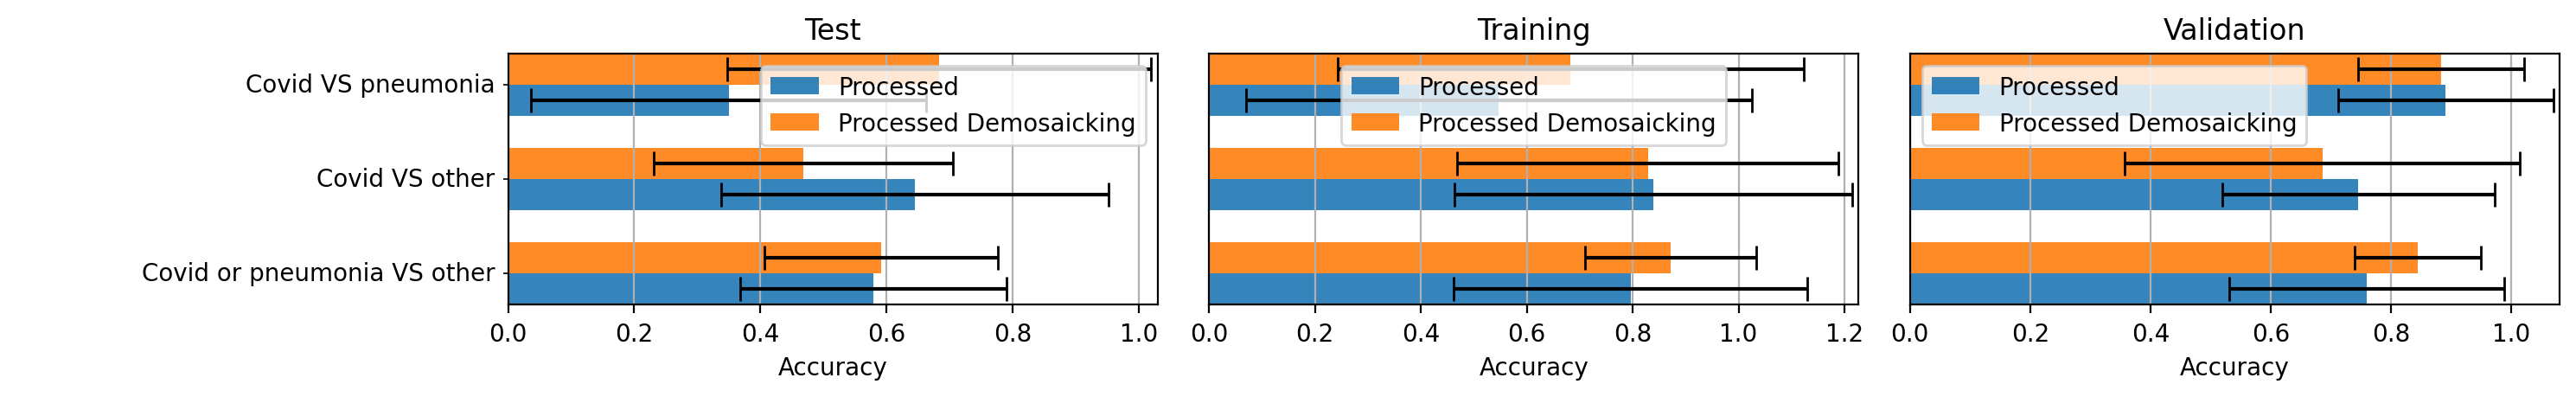

In [12]:
barplots(
    temp.drop(columns=["holdout_number"]),
    groupby=["run_type", "task_name", "dataset"],
    orientation="horizontal",
    height=5,
    unique_minor_labels=True,
    subplots=True,
    show_legend=True
)